<!--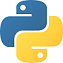-->
# 14 Graphs II Path Finding

## Plan for the Lecture 

* Recap on Graph Theory 

* Dijkstra's algorithm

* A* algorithm

* Network Flow

## Reminder on Graphs

* The basis of a Graph class in Python is the implementation of two classes, Graph and Vertex, which establish the essential functionality to create a variety of graphs.

* The Vertex class allows for storage of connecting vertices with a dictionary and adjustment of their edges as well.

* The Graph class builds upon the Vertex methods and allows addition of vertices and edges, setting the directionality of edges, and determining if a path exists between two vertices.

<img src="https://miro.medium.com/max/1208/1*SSSa5VrhhjNrXDdWTBGXlA.gif" alt="graph_path" width="450">  


In [1]:
class Vertex: 
    """Key methods of Vertex class"""
    def __init__(self, value):
        ...
    def add_edge(self, vertex, weight = 0):
        ...
    def get_edges(self):
        ...

In [2]:
class Graph: 
    """Key methods of Graph class"""
    def __init__(self, directed = False):
        ...
    def add_vertex(self, vertex):
        ...
    def add_edge(self, from_vertex, to_vertex, weight = 0):
        ...
    def find_path(self, start_vertex, end_vertex):
        ...

In [3]:
def bfs(graph, start_vertex, target_value):
  path = [start_vertex]
  vertex_and_path = [start_vertex, path]
  bfs_queue = [vertex_and_path]
  visited = set()
  while bfs_queue:
    current_vertex, path = bfs_queue.pop(0)
    visited.add(current_vertex)
    for neighbor in graph[current_vertex]:
      if neighbor not in visited:
        if neighbor is target_value:
          return path + [neighbor]
        else:
          bfs_queue.append([neighbor, path + [neighbor]])

def dfs(graph, current_vertex, target_value, visited = None):
  if visited is None:
    visited = []
  visited.append(current_vertex)
  if current_vertex is target_value:
    return visited
  
  for neighbor in graph[current_vertex]:
    if neighbor not in visited:
      path = dfs(graph, neighbor, target_value, visited)
      if path:
        return path

some_important_graph = {
    'lava': set(['sharks', 'piranhas']),
    'sharks': set(['lava', 'bees', 'lasers']),
    'piranhas': set(['lava', 'crocodiles']),
    'bees': set(['sharks']),
    'lasers': set(['sharks', 'crocodiles']),
    'crocodiles': set(['piranhas', 'lasers'])
  }

print(bfs(some_important_graph, 'lava', 'lasers'))
print(dfs(some_important_graph, 'lava', 'lasers'))

['lava', 'sharks', 'lasers']
['lava', 'sharks', 'lasers']


# Dijsktra's Algorithm

The algorithm was invented by Edsgar W. Dijkstra (1930-2002) in 1956. 

![Edsgar](http://www.computinghistory.org.uk/userdata/images/large/34/84/product-73484.jpg)

* It was originally conceived to find the shortest path to all vertices (known as all pairs shortest paths), 

* However, it is easy to take a subset of this as 'single source shortest path' - to find the find the shortest path between two specific vertices. 

* It works with assigning labels to each vertex in the graph, as they are visited. 

* The label contains the sum of the weighting to travel to that vertex. At the end, the shortest path is revealed by the smallest label.

* Dijkstra's algorithm can handle cycles in a Graph, but not negative edge weights. The algorithm only works with non-negative edge weights. 

* If you have negative edge weights - look at the Bellman Ford algorithm. 



<!--![dijalgo1](https://upload.wikimedia.org/wikipedia/commons/5/57/Dijkstra_Animation.gif) -->

![dijalgo2](https://2497063786-files.gitbook.io/~/files/v0/b/gitbook-legacy-files/o/assets%2F-LdGcqx-Ay6h4-DM_J08%2F-LdQqBd3uKWBVNik1EzU%2F-LdQqDsb98yf6tUa_Yif%2Fdijkstra.gif?alt=media&token=a2c261f8-3e0a-46ab-a6cc-abe9f6b2b934)

* Imagine <b>BFS</b> as a ripple spreading uniformly through a graph. 

* Dijkstra uses the same ripple but <b>prioritizes</b> areas with lower edge weights, ensuring it reaches the destination along the shortest path => a <b>priority queue</b>

* Remember BFS from previous sessions?

<img src="Breadth-First-Tree-Traversal.gif" alt="DFS_paths" width="850">  

In [ ]:
graph = {
  'A': [('B', 10), ('C', 3)],
  'B': [('C', 3), ('D', 2)],
  'C': [('D', 2)],
  'D': [('E', 10)],
  'E': [('B', 15)],
}


for vertex in graph:
  print("\n\nVertex {0} connects to: ".format(vertex))
  for edge in graph[vertex]:
    print("vertex {0} with a weight of {1}".format(edge[0], edge[1]))



Vertex A connects to: 
vertex B with a weight of 10
vertex C with a weight of 3


Vertex B connects to: 
vertex C with a weight of 3
vertex D with a weight of 2


Vertex C connects to: 
vertex D with a weight of 2


Vertex D connects to: 
vertex E with a weight of 10


Vertex E connects to: 
vertex B with a weight of 15


# Implementation



```
wrap start and goal in Nodes
insert start node into open list 
Loop while open not empty
    set current to lowest node in open
    remove current from open
    store current’s adjacent vertices in adjacent linked list
    loop while adjacent not empty
        set adj to lowest weighted in adjacent list
        wrap adj in Node
        set distance to current’s g value + DistanceBetween current and adj 
        if adj node’s g is zero or distance < adj node’s g
            set adj node’s g to distance
            set adj node’s parent to current end if
        if adj is goal
            return ReconstructPlan(adj’s node)
        end if
        insert adj’s node into open
        delete adj from adjacent list
    end loop 
end loop
return 0
```

In [ ]:
def bfs(graph, start_vertex, target_value):
  path = [start_vertex]
  vertex_and_path = [start_vertex, path]
  bfs_queue = [vertex_and_path]
  visited = set()
  while bfs_queue:
    current_vertex, path = bfs_queue.pop(0)
    visited.add(current_vertex)
    for neighbor in graph[current_vertex]:
      if neighbor not in visited:
        if neighbor is target_value:
          return path + [neighbor]
        else:
          bfs_queue.append([neighbor, path + [neighbor]])

In [ ]:
import heapq
def dijkstra(self, start):
    # Initialize distances and priority queue
    distances = {i: float('inf') for i in range(self.vertices)}
    distances[start] = 0
    priority_queue = [(0, start)]  # (distance, vertex)
    visited = set()
    
    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)
        
        if current_vertex in visited:
            continue
        visited.add(current_vertex)
        
        # Explore neighbors
        for neighbor, weight in self.adj_list[current_vertex]:
            distance = current_distance + weight
            
            # If a shorter path is found
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))
    
    return distances

In [ ]:
function Dijkstra(Graph, source):
       dist[source]  := 0                     // Distance from source to source is set to 0
       for each vertex v in Graph:            // Initializations
           if v ≠ source
               dist[v]  := infinity           // Unknown distance function from source to each node set to infinity
           add v to Q                         // All nodes initially in Q

      while Q is not empty:                  // The main loop
          v := vertex in Q with min dist[v]  // In the first run-through, this vertex is the source node
          remove v from Q 

          for each neighbor u of v:           // where neighbor u has not yet been removed from Q.
              alt := dist[v] + length(v, u)
              if alt < dist[u]:               // A shorter path to u has been found
                  dist[u]  := alt            // Update distance of u 

      return dist[]
  end function

## Priority Queues via the `heapq` library

* Remember that we can use `heapq` for priority queues? 

* We can heapify up or down

![heapq](https://i.imgur.com/nJOypZz.gif)

In [5]:
#Write Import Statement here
import heapq

heap = [(0, 'A')]
heapq.heappush(heap, (1, 'B'))
heapq.heappush(heap, (-5, 'D'))
heapq.heappush(heap, (4, 'E'))
heapq.heappush(heap, (2, 'C'))

print("The smallest values in the heap in ascending order are:\n")
while heap:
  print(heapq.heappop(heap))

The smallest values in the heap in ascending order are:

(-5, 'D')
(0, 'A')
(1, 'B')
(2, 'C')
(4, 'E')


# Dijkstra's Algorithm



In [ ]:
from heapq import heappop, heappush
from math import inf

graph = {
        'A': [('B', 10), ('C', 3)],
        'C': [('D', 2)],
        'D': [('E', 10)],
        'E': [],
        'B': [('C', 3), ('D', 2)]
    }


def dijkstras(graph, start):
  distances = {}
  for vertex in graph:
    distances[vertex] = inf
  distances[start] = 0
  vertices_to_explore = [(0, start)]
  
  while vertices_to_explore:
    current_distance, current_vertex = heappop(vertices_to_explore)

    for neighbor, edge_weight in graph[current_vertex]:
      new_distance = current_distance + edge_weight
      if new_distance < distances[neighbor]:
        distances[neighbor] = new_distance
        heappush(vertices_to_explore, (new_distance, neighbor))
        
  return distances
        
distances_from_a = dijkstras(graph, 'A')
print("\n\nShortest Distances: {0}".format(distances_from_a))




Shortest Distances: {'A': 0, 'C': 3, 'D': 5, 'E': 15, 'B': 10}


In [7]:
from math import inf
inf

inf

In [8]:
from heapq import heappop, heappush
from math import inf

graph = {
        'A': [('B', 10), ('C', 3)],
        'C': [('D', 2)],
        'D': [('E', 10)],
        'E': [('A', 7)],
        'B': [('C', 3), ('D', 2)]
    }


def dijkstras(graph, start):
  distances = {}
  
  for vertex in graph:
    distances[vertex] = inf
    
  distances[start] = 0
  vertices_to_explore = [(0, start)]
  
  while vertices_to_explore:
    current_distance, current_vertex = heappop(vertices_to_explore)
    
    for neighbor, edge_weight in graph[current_vertex]:
      new_distance = current_distance + edge_weight
      
      if new_distance < distances[neighbor]:
        distances[neighbor] = new_distance
        heappush(vertices_to_explore, (new_distance, neighbor))
        
  return distances
        
distances_from_d = dijkstras(graph, 'D')
print("\n\nShortest Distances: {0}".format(distances_from_d))




Shortest Distances: {'A': 17, 'C': 20, 'D': 0, 'E': 10, 'B': 27}


# A star 

* This algorithm was first published in 1968 by colleagues at the Stanford Research Institute.

* It can be seen as an extension of Dijkstra's algorithm. A* achieves better performance by using heuristics to guide its search.

* Compared to Dijkstra's algorithm, the A* algorithm only finds the shortest path from a specified source to a specified goal, and not the shortest-path tree from a specified source to all possible goals. This is a necessary trade-off for using a specific-goal-directed heuristic. 

* For Dijkstra's algorithm, since the entire shortest-path tree is generated, every node is a goal, and there can be no specific-goal-directed heuristic.

![astar](https://user-images.githubusercontent.com/31979840/47058074-659c3800-d191-11e8-9300-a50b43845a82.gif)

```
wrap start and goal in Nodes 
insert start node into open list 
Loop while open not empty
    set current to lowest node in open 
    remove current from open
    store current’s adjacent vertices in adjacent priority list 
    loop while adjacent not empty
        set adj to the remove vertex in adjacent priority list wrap adj in Node
        set adjNode’s parent to current
        if adjNode is goal
            return ReconstructPlan(adj’s node)
        end if
        adjNode’s g = current’s g + DistanceBwteenvertices current and adj 
        adjNode’s h = GetHeuristic between adj and goal
        adjNode’s f = g + h
        set foundInOpen = find adj’s node in open list
        if foundInOpen <> 0 and foundInOpen’s f < adj Node’s f
            skip to next adjacent iteration
        end if
        set foundInClosed = find adj’s node in closed list
        if foundInClose <> 0 and foundInClosed’s f < adj Node’s f
            skip to next adjacent iteration
        end if
        insert adj node into open 
    end loop
    insert current into closed
end loop
return 0

```

In [9]:
from math import inf
from heapq import heappop, heappush

def a_star(graph, start, target):
  paths_and_distances = {}
  for vertex in graph:
    paths_and_distances[vertex] = [inf, [start.name]]
  
  paths_and_distances[start] = 0
  vertices_to_explore = [(0, start)]

  while vertices_to_explore:
    current_distance, current_vertex = heappop(vertices_to_explore)
    for neighbor, edge_weight in graph[current_vertex]:
      new_distance = current_distance + edge_weight
      if new_distance < paths_and_distances[neighbor]:
        paths_and_distances[neighbor] = new_distance
        heappush(vertices_to_explore, (new_distance, neighbor))
  
  return paths_and_distances

In [ ]:
# A* #
from math import inf
from heapq import heappop, heappush

def a_star(graph, start, target):
  paths_and_distances = {}
  for vertex in graph:
    paths_and_distances[vertex] = [inf, [start.name]]
  
  paths_and_distances[start] = 0
  vertices_to_explore = [(0, start)]

  while vertices_to_explore:
    current_distance, current_vertex = heappop(vertices_to_explore)
    for neighbor, edge_weight in graph[current_vertex]:
      new_distance = current_distance + edge_weight
      if new_distance < paths_and_distances[neighbor]:
        paths_and_distances[neighbor] = new_distance
        heappush(vertices_to_explore, (new_distance, neighbor))
  
  return paths_and_distances

# A graph and vertices for us to play around with:
class graph_vertex:
  def __init__(self, name, x, y):
    self.name = name
    self.position = (x, y)

delhi = graph_vertex("New Delhi", 28.6448, 77.216721)
jaipur = graph_vertex("Jaipur", 26.92207, 75.778885)
varanasi = graph_vertex("Varanasi", 25.321684, 82.987289)
mumbai = graph_vertex("Mumbai", 19.07283, 72.88261)
chennai = graph_vertex("Chennai", 13.067439, 80.237617)
hyderabad = graph_vertex("Hyderabad", 17.387140, 78.491684)
kolkata = graph_vertex("Kolkata", 22.572645, 88.363892)
bengaluru = graph_vertex("Bengaluru", 12.972442, 77.580643)

cities_graph = {
  delhi: set([(jaipur, 2.243918), (varanasi, 6.65902), (mumbai, 10.507479), (chennai, 15.867576), (hyderabad, 11.329626), (kolkata, 12.693718), (bengaluru, 15.676582)]),
  jaipur: set([(mumbai, 8.366539), (delhi, 2.243918)]),
  varanasi: set([(delhi, 6.65902), (mumbai, 11.88077)]),
  mumbai: set([(delhi, 10.507479), (jaipur, 8.366539), (varanasi, 11.88077), (hyderabad, 5.856898), (kolkata, 15.87195), (bengaluru, 7.699756)]),
  chennai: set([(delhi, 15.867576), (kolkata, 12.50541), (hyderabad, 4.659195), (bengaluru, 2.658671)]),
  hyderabad: set([(delhi, 11.329626), (mumbai, 5.856898), (chennai, 4.659195), (bengaluru, 4.507721), (kolkata, 11.151231)]),
  kolkata: set([(delhi, 12.693718), (mumbai, 15.87195), (chennai, 12.50541), (hyderabad, 11.151231), (bengaluru, 14.437532)]),
  bengaluru: set([(delhi, 15.676582), (mumbai, 7.699756), (chennai, 2.658671), (hyderabad, 4.507721), (kolkata, 14.437532)])
}

a_star(cities_graph, delhi, varanasi)


TypeError: '<' not supported between instances of 'float' and 'list'

# Add Heuristic
So far, what you’ve created is a modified Dijkstra’s algorithm that has a target and returns the path to that target.

To make this algorithm truly a star A*, you’ll need to add a heuristic that estimates the distance from a given vertex to the target.

By doing this, the algorithm is able to efficiently and accurately predict whether or not it is heading in the best possible direction.

In [5]:
from math import inf
from heapq import heappop, heappush
from manhattan_graph import manhattan_graph, thirty_sixth_and_sixth, grand_central_station

def modified_dijkstras(graph, start, target):
  print("Starting Dijkstra's algorithm!")
  count = 0
  paths_and_distances = {}
  for vertex in graph:
    paths_and_distances[vertex] = [inf, [start.name]]
  
  paths_and_distances[start][0] = 0
  vertices_to_explore = [(0, start)]

  while vertices_to_explore:
    current_distance, current_vertex = heappop(vertices_to_explore)
    for neighbor, edge_weight in graph[current_vertex]:
      new_distance = current_distance + edge_weight
      new_path = paths_and_distances[current_vertex][1] + [neighbor.name]
      if new_distance < paths_and_distances[neighbor][0]:
        paths_and_distances[neighbor][0] = new_distance
        paths_and_distances[neighbor][1] = new_path
        heappush(vertices_to_explore, (new_distance, neighbor))
        count += 1
        print("\nAt " + vertices_to_explore[0][1].name)
  print("Found a path in {0} steps: ".format(count), paths_and_distances[target][1])
  return paths_and_distances[target][1]

def heuristic(start, target):
  x_distance = abs(start.position[0] - target.position[0])
  y_distance = abs(start.position[1] - target.position[1])
  return x_distance + y_distance

def a_star(graph, start, target):
  print("Starting A* algorithm!")
  count = 0
  paths_and_distances = {}
  for vertex in graph:
    paths_and_distances[vertex] = [inf, [start.name]]
  
  paths_and_distances[start][0] = 0
  vertices_to_explore = [(0, start)]
  while vertices_to_explore and paths_and_distances[target][0] == inf:
    current_distance, current_vertex = heappop(vertices_to_explore)
    for neighbor, edge_weight in graph[current_vertex]:
      new_distance = current_distance + edge_weight + heuristic(neighbor, target)
      new_path = paths_and_distances[current_vertex][1] + [neighbor.name]
      
      if new_distance < paths_and_distances[neighbor][0]:
        paths_and_distances[neighbor][0] = new_distance
        paths_and_distances[neighbor][1] = new_path
        heappush(vertices_to_explore, (new_distance, neighbor))
        count += 1
        print("\nAt " + vertices_to_explore[0][1].name)
        
  print("Found a path in {0} steps: ".format(count), paths_and_distances[target][1])
  
  return paths_and_distances[target][1]


modified_dijkstras(manhattan_graph, thirty_sixth_and_sixth, grand_central_station)

a_star(manhattan_graph, thirty_sixth_and_sixth, grand_central_station)

ModuleNotFoundError: No module named 'manhattan_graph'

# Manhattan Heuristic

There are several kinds of heuristics out there that you can use to estimate distance, but we’ll start with the Manhattan heuristic. This heuristic is only considered admissible — meaning that it never overestimates the distance in reaching the target — in a grid system in which the search can only move up, down, left, or right.

To get the heuristic estimate, we need to:

- Measure the distance between the two vertices’ x positional values and between their y positional values.
- Return the sum of the x distance and y distance together.

![manhattan](https://www.101computing.net/wp/wp-content/uploads/taxicab-manhattan-grid-layout-paths.gif) 

In [ ]:
from math import inf
from heapq import heappop, heappush
from manhattan_graph import manhattan_graph, penn_station, grand_central_station

# Manhattan Heuristic
def heuristic(start, target):
  x_distance = abs(start.position[0] - target.position[0])
  y_distance = abs(start.position[1] - target.position[1])
  return x_distance + y_distance

def a_star(graph, start, target):
  print("Starting A* algorithm!")
  count = 0
  paths_and_distances = {}
  for vertex in graph:
    paths_and_distances[vertex] = [inf, [start.name]]
  
  paths_and_distances[start][0] = 0
  vertices_to_explore = [(0, start)]
  while vertices_to_explore and paths_and_distances[target][0] == inf:
    current_distance, current_vertex = heappop(vertices_to_explore)
    for neighbor, edge_weight in graph[current_vertex]:
      new_distance = current_distance + edge_weight + heuristic(neighbor, target)
      new_path = paths_and_distances[current_vertex][1] + [neighbor.name]
      
      if new_distance < paths_and_distances[neighbor][0]:
        paths_and_distances[neighbor][0] = new_distance
        paths_and_distances[neighbor][1] = new_path
        heappush(vertices_to_explore, (new_distance, neighbor))
        count += 1
        print("\nAt " + vertices_to_explore[0][1].name)
        
  print("Found a path from {0} to {1} in {2} steps: ".format(start.name, target.name, count), paths_and_distances[target][1])
  
  return paths_and_distances[target][1]

# Call a_star() on manhattan_graph to find the best route
# from penn_station to grand_central_station:
a_star(manhattan_graph, penn_station, grand_central_station)

# Euclidean Heuristic

Not all vertices are on a grid and sometimes the shortest distance is closer to a direct diagonal line between two points. For these situations, a Manhattan heuristic would overestimate the total distance, making it inadmissible; the Euclidean heuristic would be a better fit.

The Euclidean heuristic works off of the Pythagorean theorem: 
​	 
When you think about it, what we are finding is essentially a hypotenuse of a right triangle; the other two sides would be the x-distance and the y-distance.

![euclidean_vs_manhattan](https://d1m75rqqgidzqn.cloudfront.net/wp-data/2020/07/01130416/june-30-hierarchical-clustering-infograph-for-blog-4.png)


In [ ]:
from math import inf, sqrt
from heapq import heappop, heappush
from euclidean_graph import euclidean_graph, bengaluru, jaipur

# Euclidean Heuristic
def heuristic(start, target):
  x_distance = abs(start.position[0] - target.position[0])
  y_distance = abs(start.position[1] - target.position[1])
  return sqrt(x_distance * x_distance + y_distance * y_distance)

def a_star(graph, start, target):
  print("Starting A* algorithm!")
  count = 0
  paths_and_distances = {}
  for vertex in graph:
    paths_and_distances[vertex] = [inf, [start.name]]
  
  paths_and_distances[start][0] = 0
  vertices_to_explore = [(0, start)]
  while vertices_to_explore and paths_and_distances[target][0] == inf:
    current_distance, current_vertex = heappop(vertices_to_explore)
    for neighbor, edge_weight in graph[current_vertex]:
      new_distance = current_distance + edge_weight + heuristic(neighbor, target)
      new_path = paths_and_distances[current_vertex][1] + [neighbor.name]
      
      if new_distance < paths_and_distances[neighbor][0]:
        paths_and_distances[neighbor][0] = new_distance
        paths_and_distances[neighbor][1] = new_path
        heappush(vertices_to_explore, (new_distance, neighbor))
        count += 1
        print("\nAt " + vertices_to_explore[0][1].name)
        
  print("Found a path from {0} to {1} in {2} steps: ".format(start.name, target.name, count), paths_and_distances[target][1])
  
  return paths_and_distances[target][1]

# Call a_star() on euclidean_graph to find the best route
# from jaipur to bengaluru:
a_star(euclidean_graph, jaipur, bengaluru)

## Network Flow 

* The flow in a network of nodes can also be modelled via a directed graph.

* Examples include: 
    * Natural energy: (water, gas, electricity etc) as it flows from source to destination. 
    * Transport (roads, trains, and even areoplanes)
    * Devices that communicate by sending packets of data across a network.

* Furthermore, we'll see that dynamic programming can be applied to network flow applications to calculate the maximum and minimum flows, and also optimise path finding.

* <b>The fundamental difference between graphs and networks, is that graphs focus on the distance, but networks focus on capacity (think volume) of flow between nodes/vertices.</b>

## Traffic flow example

* Road works (or engineering works that close railway lines!) are frustrating to travellers but essential for repair and maintenance. 

* This impacts the flow of traffic in a network, so we can model this real-life phenomenon with network flow. 

<img src="https://wealthandtax.co.uk/wp-content/uploads/2020/04/shutterstock_631880864-scaled.jpg" alt="roadworks" width="850">  

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add edges along with their capacities
G.add_edge('A', 'B', capacity=10)
G.add_edge('A', 'C', capacity=15)
G.add_edge('B', 'D', capacity=10)
G.add_edge('C', 'D', capacity=10)
G.add_edge('B', 'E', capacity=5)
G.add_edge('D', 'E', capacity=10)


In [16]:
source = 'A'
sink = 'E'

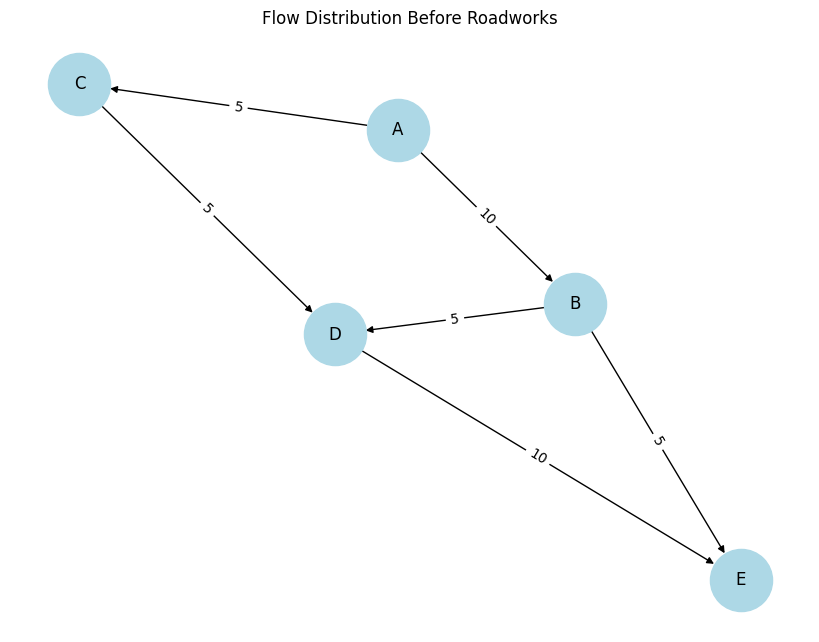

In [17]:
import matplotlib.pyplot as plt

def visualize_flow(G, flow_dict, title):
    pos = nx.spring_layout(G)
    edge_labels = {}
    for u in flow_dict:
        for v in flow_dict[u]:
            if flow_dict[u][v] > 0:
                edge_labels[(u, v)] = flow_dict[u][v]
    
    plt.figure(figsize=(8,6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.show()

# Visualize initial flow
visualize_flow(G, initial_flow_dict, "Flow Distribution Before Roadworks")

## Edmonds-Karp vs Ford-Fulkerson

* The Edmonds-Karp algorithm is a specific implementation of the Ford-Fulkerson method 

* Edmonds-Karp employs Breadth-First Search (BFS) to find the shortest augmenting paths, thereby ensuring polynomial time complexity. $O(n^k)$

* Ford-Fulkerson Method:
    * A general algorithm to compute the maximum flow in a flow network.
	* It works by repeatedly finding augmenting paths from the source to the sink and increasing the flow until no more augmenting paths exist.
	* The method’s performance depends on how the augmenting paths are selected. Without a specific strategy, its time complexity can be unbounded, especially with irrational capacities.

* Edmonds-Karp Algorithm:
	* A specific implementation of the Ford-Fulkerson method.
	* It uses BFS to find the shortest (in terms of the number of edges) augmenting path in each iteration.
	* Guarantees a time complexity of  $O(V \times E^2)$  where  V  is the number of vertices and  E  is the number of edges.

* In summary, Edmonds-Karp is essentially Ford-Fulkerson with a specific path selection strategy (BFS), making it more efficient and predictable.


In [18]:
def compute_max_flow(G, source, sink):
    # Compute the maximum flow using the Edmonds-Karp algorithm
    flow_value, flow_dict = nx.maximum_flow(G, source, sink, flow_func=nx.algorithms.flow.edmonds_karp)
    
    print(f"Maximum flow from {source} to {sink}: {flow_value} vehicles/hour")
    print("Flow distribution:")
    for u in flow_dict:
        for v in flow_dict[u]:
            if flow_dict[u][v] > 0:
                print(f"  {u} -> {v}: {flow_dict[u][v]} vehicles/hour")
    print("\n")
    return flow_value, flow_dict

In [19]:
print("=== Initial Scenario ===")
initial_flow, initial_flow_dict = compute_max_flow(G, source, sink)

=== Initial Scenario ===
Maximum flow from A to E: 15 vehicles/hour
Flow distribution:
  A -> B: 10 vehicles/hour
  A -> C: 5 vehicles/hour
  B -> D: 5 vehicles/hour
  B -> E: 5 vehicles/hour
  C -> D: 5 vehicles/hour
  D -> E: 10 vehicles/hour




In [20]:
# Simulate roadworks: reduce capacity of C -> D from 10 to 5
G['C']['D']['capacity'] = 5

print("=== After Roadworks on C -> D ===")
new_flow, new_flow_dict = compute_max_flow(G, source, sink)

=== After Roadworks on C -> D ===
Maximum flow from A to E: 15 vehicles/hour
Flow distribution:
  A -> B: 10 vehicles/hour
  A -> C: 5 vehicles/hour
  B -> D: 5 vehicles/hour
  B -> E: 5 vehicles/hour
  C -> D: 5 vehicles/hour
  D -> E: 10 vehicles/hour




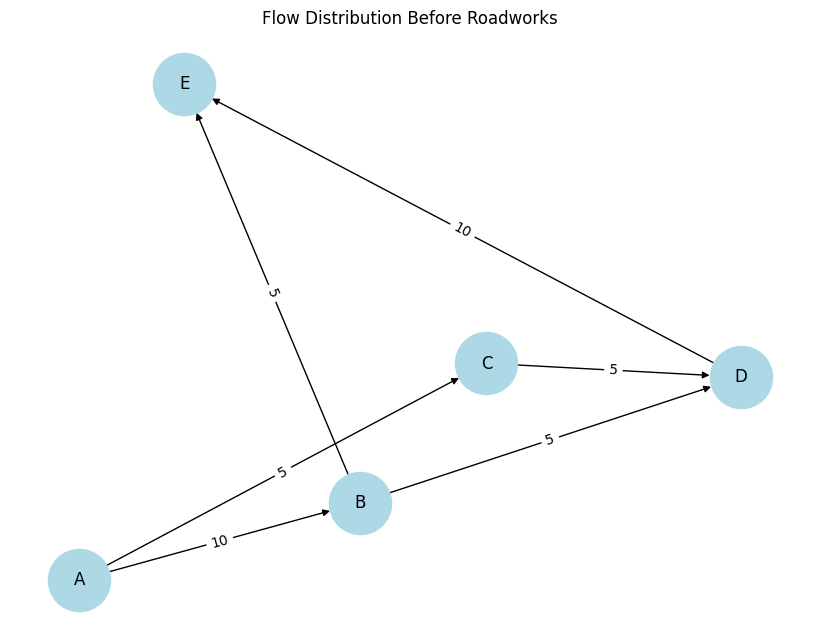

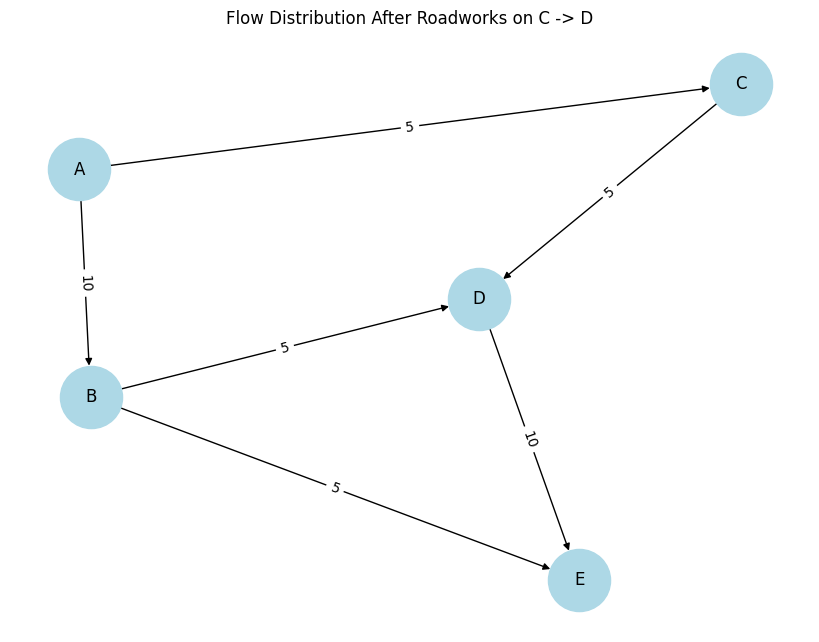

In [21]:
import matplotlib.pyplot as plt

def visualize_flow(G, flow_dict, title):
    pos = nx.spring_layout(G)
    edge_labels = {}
    for u in flow_dict:
        for v in flow_dict[u]:
            if flow_dict[u][v] > 0:
                edge_labels[(u, v)] = flow_dict[u][v]
    
    plt.figure(figsize=(8,6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.show()

# Visualize initial flow
visualize_flow(G, initial_flow_dict, "Flow Distribution Before Roadworks")

# Visualize flow after roadworks
visualize_flow(G, new_flow_dict, "Flow Distribution After Roadworks on C -> D")

## Visualisation of graphs - install `networkx`

`pip install networkx matplotlib`  
  `python3 -m pip install -U networkx matplotlib --user`

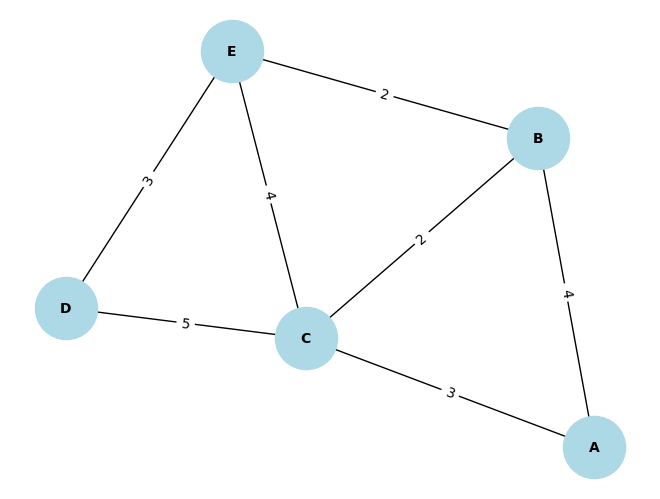

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph
G = nx.Graph()

# Add weighted edges
G.add_edge('A', 'B', weight=4)
G.add_edge('A', 'C', weight=3)
G.add_edge('B', 'C', weight=2)
G.add_edge('B', 'E', weight=2)
G.add_edge('C', 'D', weight=5)
G.add_edge('C', 'E', weight=4)
G.add_edge('D', 'E', weight=3)

# Get positions for the nodes
pos = nx.spring_layout(G)

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, font_weight='bold')

# Draw edge labels for weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

## Exercise

Insert a 'code' cell below. In this do the following:

- 1 - First create an instance of a Graph. If you completed last week's exercises, then you could utilise this graph. 
- 2 - Test that you can run Dijkstra's algorithm on a graph. 
- 3 - Now run A* (A Star) on a graph with the <b> manhattan </b> heuristic.
- 4 - Now run A* (A Star) on a graph with the <b> euclidean </b> heuristic.

## Exercise 

First ensure that you have at least one method to represent a Graph, this could be a Python `dict` for an adjacency list, or a 2D array (`numpy.array` or Python `list`) for an adjacency matrix. 

Then implement Dijkstra's algorithm to return the shortest paths to all vertices in the given graph. The returned shortest paths could be any structure - a `dictionary` or a `list`. 

## Exercise 

Now implement A* algorithm on the given graph represented below as: 

```
    A --1--> B --2--> E
     \       |       ^
      3      1       |
       \     v       5
        C --4--> D --1--> F

```

I've also provided the heuristic (estimated values) to help the algorithm:

In [ ]:
g = Graph()
g.add_edge("A", "B", 1)
g.add_edge("A", "C", 3)
g.add_edge("B", "E", 2)
g.add_edge("B", "D", 1)
g.add_edge("C", "D", 4)
g.add_edge("D", "F", 1)
g.add_edge("E", "F", 5)

heuristics = {"A": 7, "B": 6, "C": 4, "D": 2, "E": 3, "F": 0}

# Write your solution here.


## Scenario Exercise - Social Media Graphs

First observe the social networking graph produced by `networkx` below. For the purposes of this example, the connections are randomised. You may want to hardcode the examples to start with (if too complex)

Imagine you had work on the recommendation engine that would optimise suggested profiles to connect with based on existing connections. 

If you've ever used LinkedIn (recommended btw! Great for documenting your CV, and making professional connections), you may have noticed the 1st, 2nd and 3rd. This refers to 'degrees' of separation. 

https://www.linkedin.com/pulse/what-1st-2nd-3rd-connections-linkedin-onkar-gurav/ 

<b> Your task </b> is to replicate this ranking of connections. Write an algorithm that takes any starting node, and returns a list the connections who are 1 degree of separation, then 2nd and 3rd degrees of separation.

Extension: For a 'rounded' example, connect this 'backend' logic with a front-end. Use your HTML/Flask skills to create an app where users can sign up and connect with each other. If you already have something like this in another language, feel free to apply your recommendation engine to this.

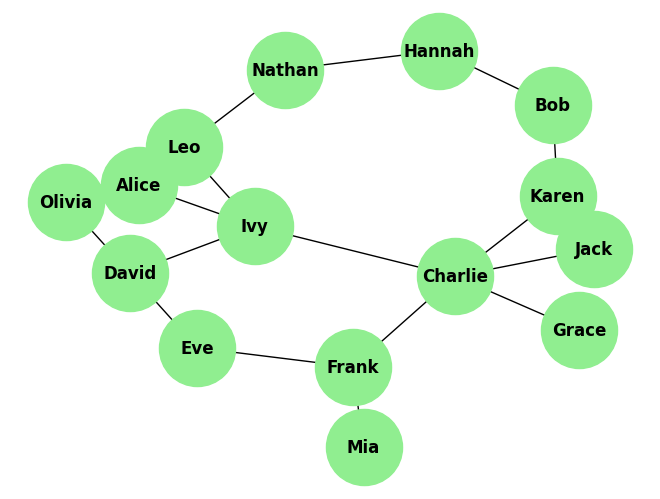

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Create a graph
G = nx.Graph()

# Add nodes (people)
people = ["Alice", "Bob", "Charlie", "David", "Eve", "Frank", "Grace", "Hannah", "Ivy", "Jack", 
          "Karen", "Leo", "Mia", "Nathan", "Olivia"]

G.add_nodes_from(people)

# Generate random connections (edges)
edges = []
for i in range(20):  # Create 20 random edges
    person1, person2 = random.sample(people, 2)  # Pick two random people
    edges.append((person1, person2))

G.add_edges_from(edges)

# Get positions for nodes
pos = nx.spring_layout(G)

# Draw the graph with labels and node features
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=3000, font_size=12, font_weight='bold')

# Display the graph
plt.show()

## Scenario Exercise - Zone 1 of the London Underground

<img src="https://media.wnyc.org/i/1860/1208/l/80/1/london_subway_map_shutterstock_174636971.jpg" alt="zone_one_underground" width="850">  


In [12]:
G = nx.Graph()

stations = ["Baker Street", "Great Portland Street", "Euston Square", "Kings Cross St Pancras", # Met line
            "Russell Square", "Holborn", "Covent Garden", "Leicester Square", "Piccadilly Circus", "Green Park", #Picadilly
            "Bond Street", "Oxford Circus", # Jubilee
            "Tottenham Court Road", "Godge Street", "Warren Street"] #Central + Vic

G.add_nodes_from(stations)

edges = [
    ("Baker Street", "Great Portland Street"), ("Great Portland Street", "Euston Square"), ("Euston Square", "Kings Cross St Pancras"), #Met line
    ("Kings Cross St Pancras", "Russell Square"), ("Russell Square", "Holborn"), ("Holborn", "Covent Garden"), ("Covent Garden", "Leicester Square"), ("Leicester Square", "Piccadilly Circus"), ("Piccadilly Circus", "Green Park"), #Picadilly
    ("Green Park", "Bond Street"), ("Bond Street", "Baker Street"), # Jubilee
    ("Bond Street", "Oxford Circus"), ("Oxford Circus", "Tottenham Court Road"), ("Tottenham Court Road",  "Holborn"), #Central
    ("Green Park", "Oxford Circus"), ("Oxford Circus", "Warren Street"), #Victoria
    ("Baker Street", "Oxford Circus"), ("Oxford Circus", "Piccadilly Circus"), # Bakerloo
    ("Leicester Square", "Tottenham Court Road"), ("Tottenham Court Road", "Godge Street"), ("Godge Street", "Warren Street") #Northern 
]

G.add_edges_from(edges)



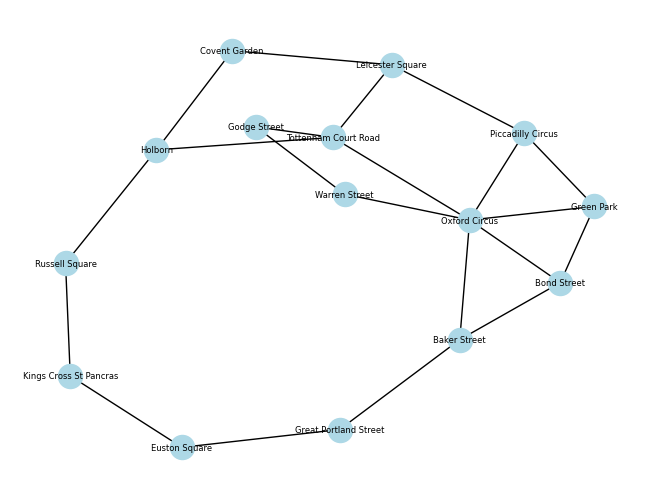

In [13]:
# Get positions for nodes
pos = nx.spring_layout(G)

# Draw the graph with labels and node features
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=300, font_size=6,)

# Display the graph
plt.show()

Well this is a different view... we'd probably have to manually format this if we wanted the graph to look like the tube map. However, this does at least show the right connections and also estimated time taken. 

Extension: Whilst a particular route may be quicker given the literal distance, how would the route planner change if you factored in the frequency of trains?

To join up with your web knowledge, why not sign up for TFL's API, so you can get access to real-life train data - https://api.tfl.gov.uk 

Factor this data into your simulation.

Extension: What about engineering works at weekends?!

Extension: What about literal distances between stations (overground)? Is it quicker to walk to the next station than wait ten minutes for the next train?